# 1. Google Colaboratory Dosyası Açılması

● Projenizin .ipynb uzantılı olmasına özen gösteriniz.
● Projenizdeki detayları açıklayan yorum satırları olmasına dikkat ediniz.
● Proje teslim edilirken bu .ipynb uzantılı dosyasının hücreleri çalıştırılmış ve sonuçları
görünecek şekilde teslim ediniz.

# 2. Importing Necessary Libraries


● Projede kullanılacak olan kütüphanelerin Colab ortamına ekleyiniz.
● Pandas, numpy, Seaborn, Matplotlib ve Sklearn kütüphanelerini ekleyiniz.

In [1]:
from os.path import join
from google.colab import drive
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
import plotly.express as px
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from termcolor import colored

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

##Preparing the Dataset

In [2]:
#Read Data 
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"


Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/insurance.csv")

In [4]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" HEAD ".center(70, '*'))
    print("\n",df.head(head),"\n")
    print(' TAIL '.center(70, '*'))
    print("\n",df.tail(tail),"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" QUANTILES ".center(70, '*'))
    print("\n",df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T,"\n")


check_df(df)

******************************* SHAPE ********************************
Observations -------> 1338
Features     -------> 7
Shape of dataset: (1338, 7)
************************* TYPES OF FEATURES **************************
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 

******************************** HEAD ********************************

    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

******************************** TAIL ********************************

       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97  

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
n_rows, n_columns = df.shape
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 1338, number of columns: 7


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe().T
# When we look through statistical values we can say that data has cohesive distribution

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is not any null value.

# 3. Keşifsel Veri Analizi Yapılması

##Verilerin birbirleriye olan genel ilişkisi

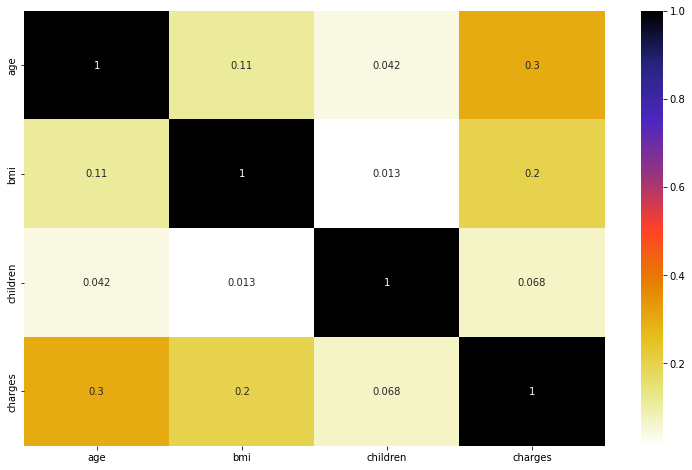

In [14]:
plt.figure(figsize=(13,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Bmi (Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


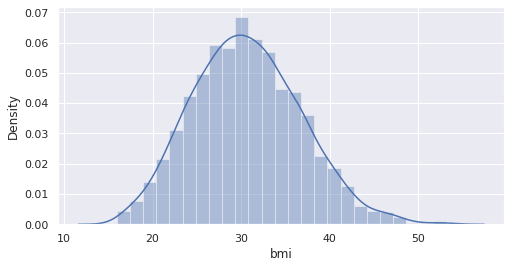

In [15]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = df['bmi']
ax = sns.distplot(x)
plt.show()
# Normal distribution

In [16]:
print('\n Distribution of BMI\n'.center(70,"*"))
print('Mean of BMI:',df['bmi'].mean())
print('Median of BMI:',df['bmi'].median())
print('Mode of BMI:',df['bmi'].mode())

************************
 Distribution of BMI
************************
Mean of BMI: 30.66339686098655
Median of BMI: 30.4
Mode of BMI: 0    32.3
dtype: float64


In [17]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


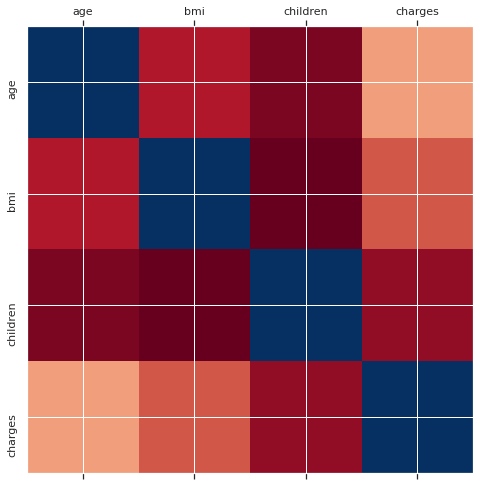

In [18]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.yticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.xticks(range(len(corr.columns)), corr.columns);
# We see that insurance costs are mostly related to age and less number of children.

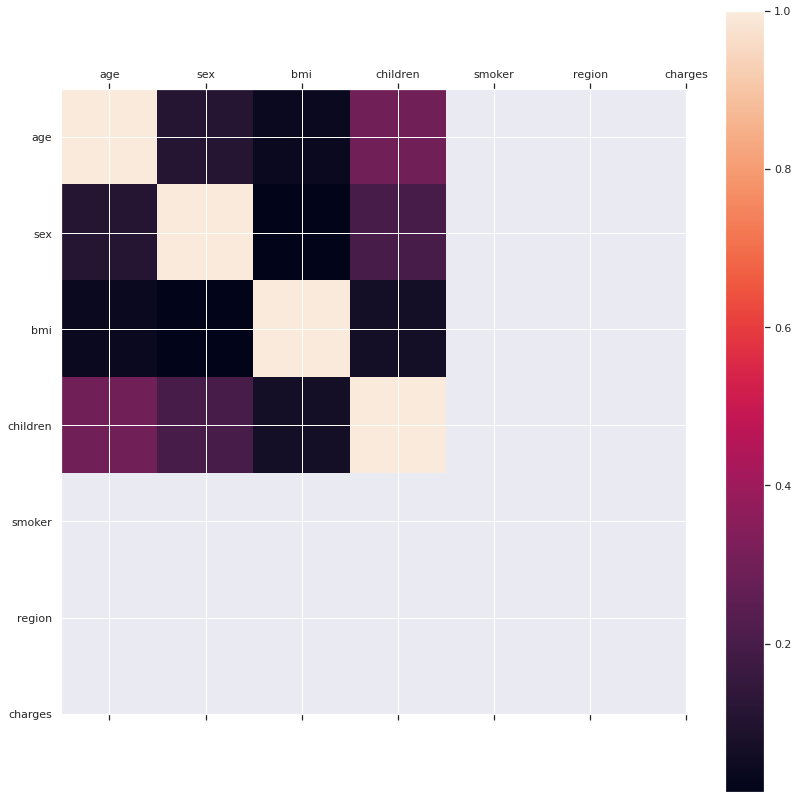

In [19]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar();

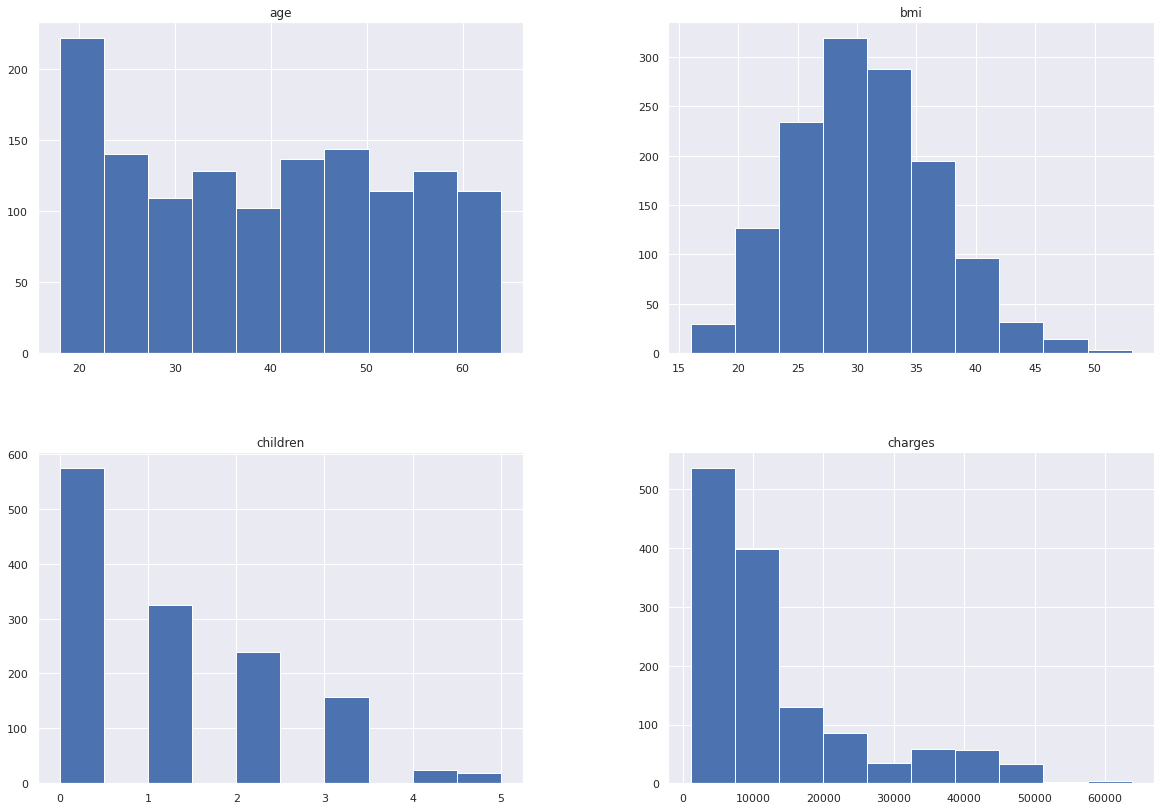

In [20]:
df.hist();

In [21]:
print('Distribution of Age\n')
print('Mean of Age:',df['age'].mean())
print('Median of Age:',df['age'].median())
print('Mode of Age:',df['age'].mode())

Distribution of Age

Mean of Age: 39.20702541106129
Median of Age: 39.0
Mode of Age: 0    18
dtype: int64


In [22]:
print('Distribution of Charges\n')
print('Mean of charges:',df['charges'].mean())
print('Median of charges:',df['charges'].median())
print('Mode of charges:',df['charges'].mode())

Distribution of Charges

Mean of charges: 13270.422265141257
Median of charges: 9382.033
Mode of charges: 0    1639.5631
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


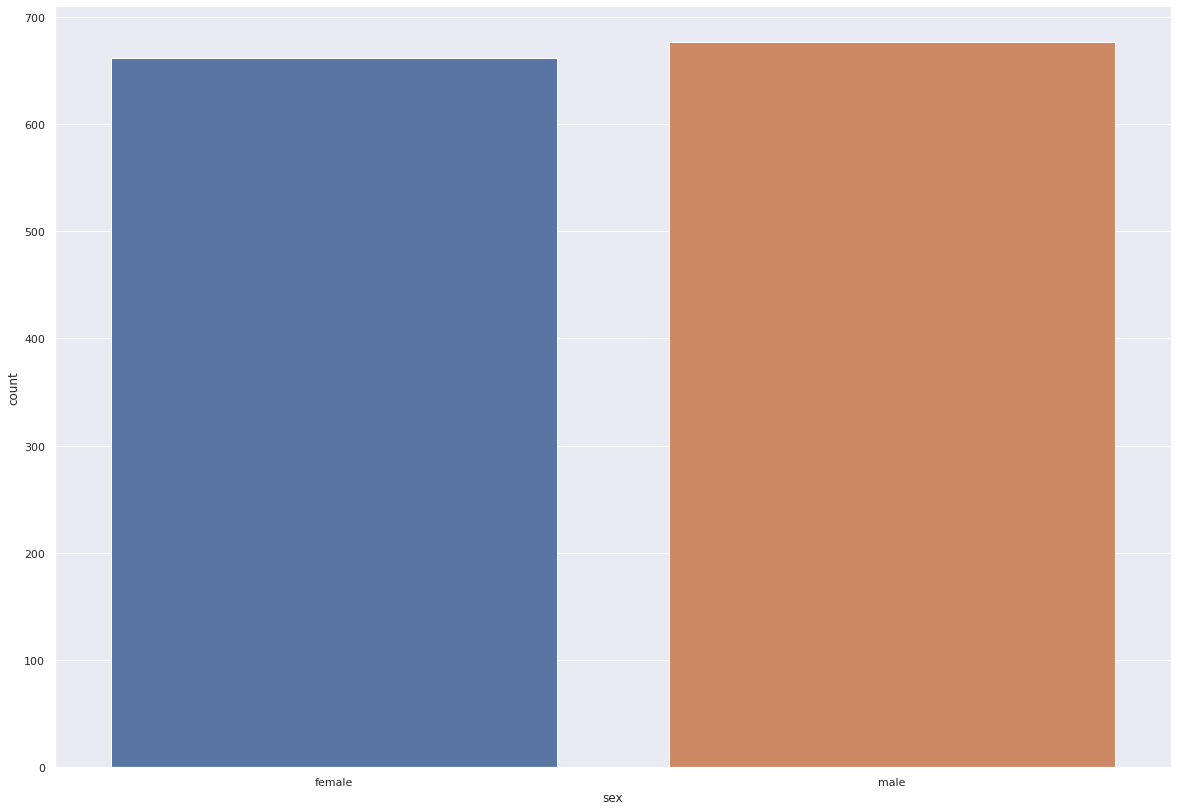

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


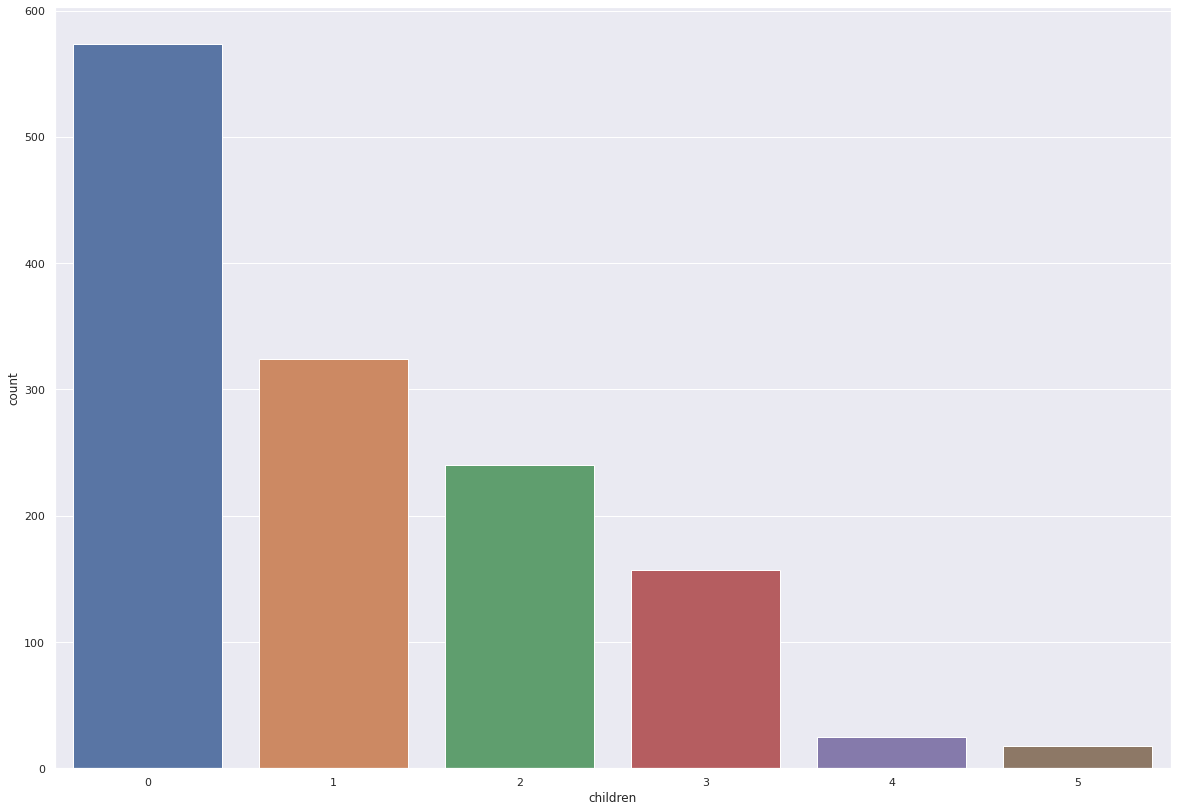

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


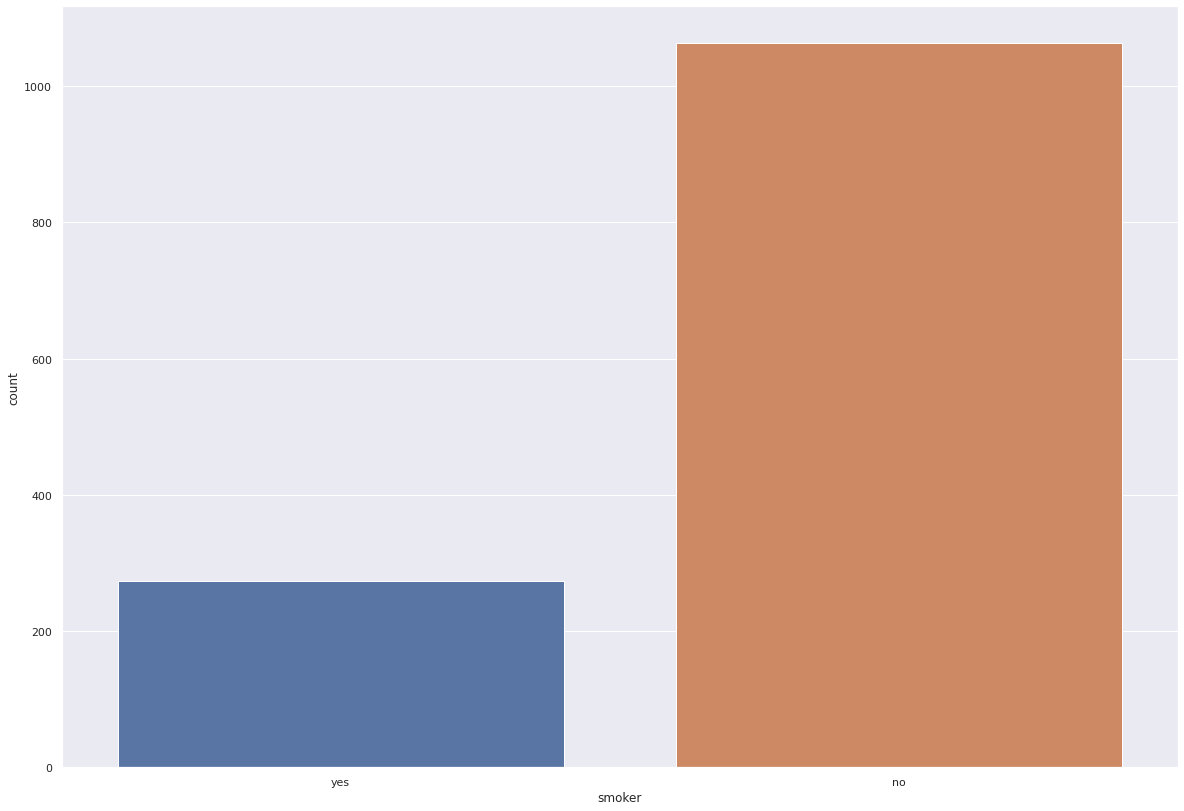

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


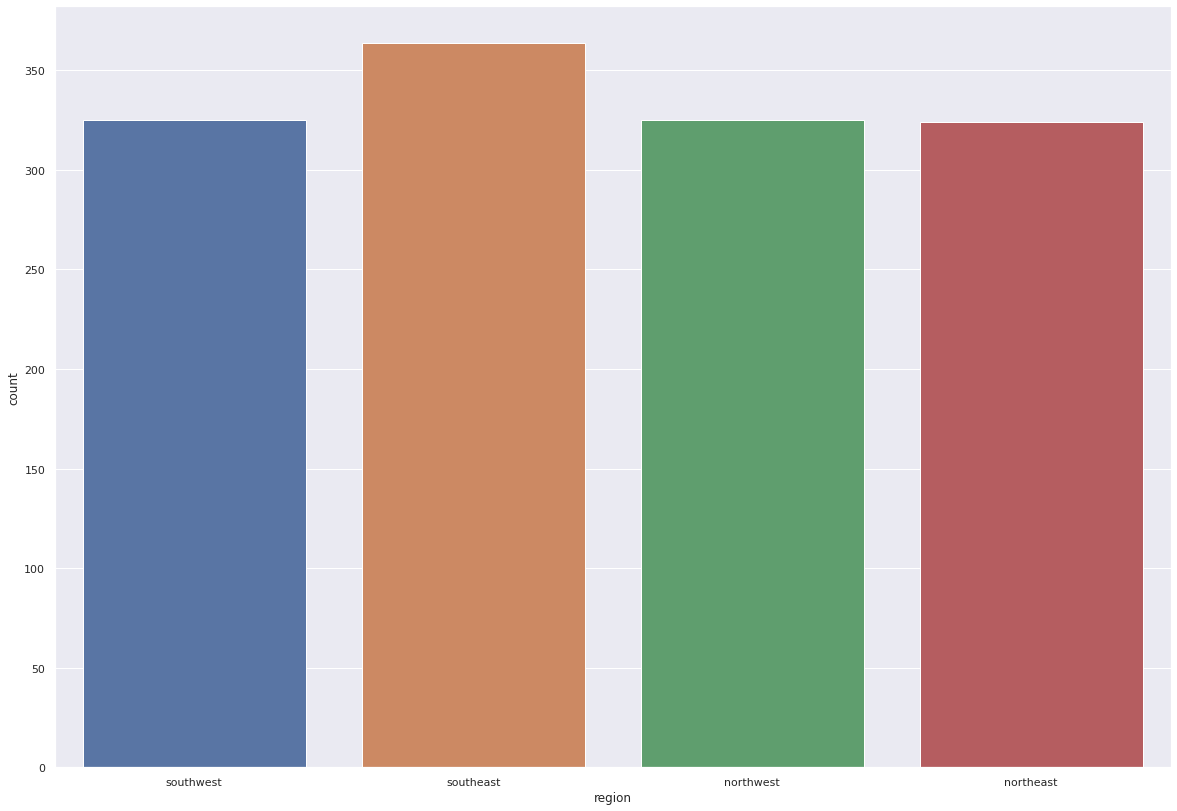

In [23]:
# Distibution of the column 'sex', 'children', 'smoker', 'region'
sns.countplot(df['sex'])    
plt.show() 
sns.countplot(df['children'])
plt.show() 
sns.countplot(df['smoker'])  
plt.show() 
sns.countplot(df['region'])
plt.show() 

##Smoker & Sex

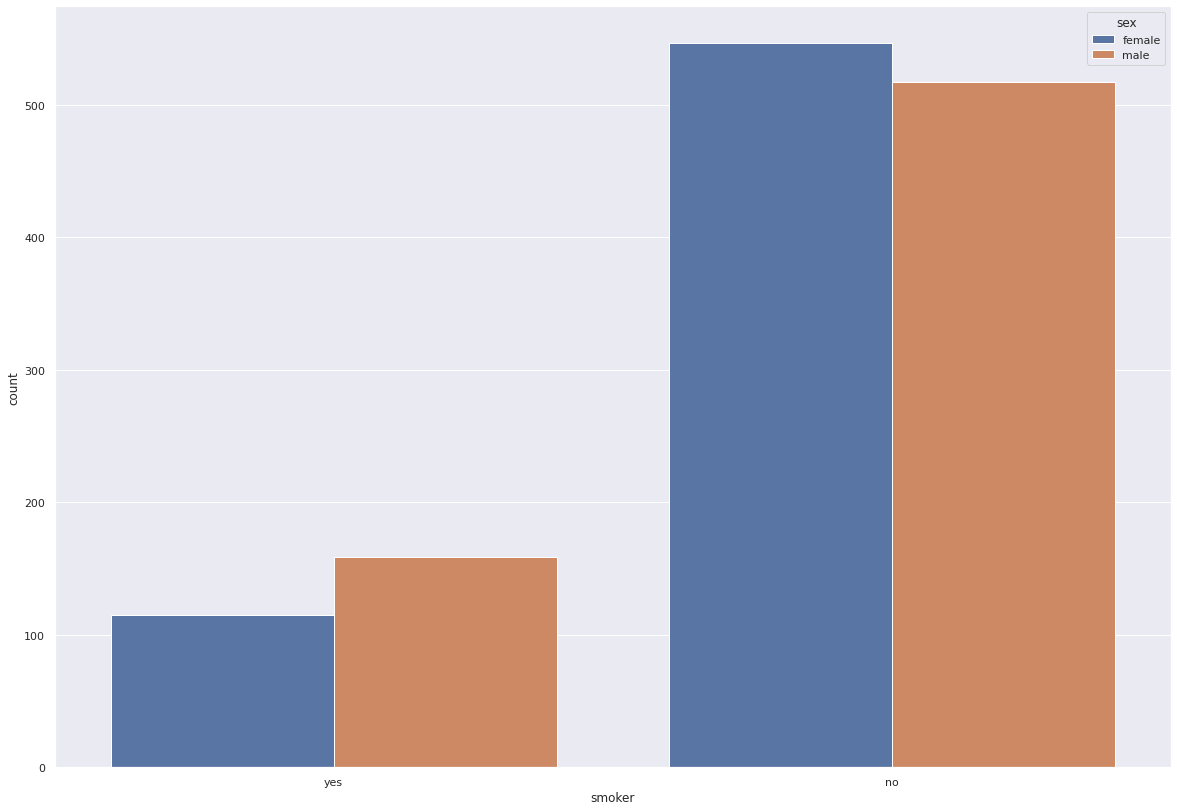

In [24]:
# count plot on two categorical variable
sns.countplot(x ='smoker', hue = "sex", data = df)
plt.show()

In [25]:
df.groupby("sex")["smoker"].value_counts(normalize=True)
# ratio of smoker males is higher than females

sex     smoker
female  no        0.826284
        yes       0.173716
male    no        0.764793
        yes       0.235207
Name: smoker, dtype: float64

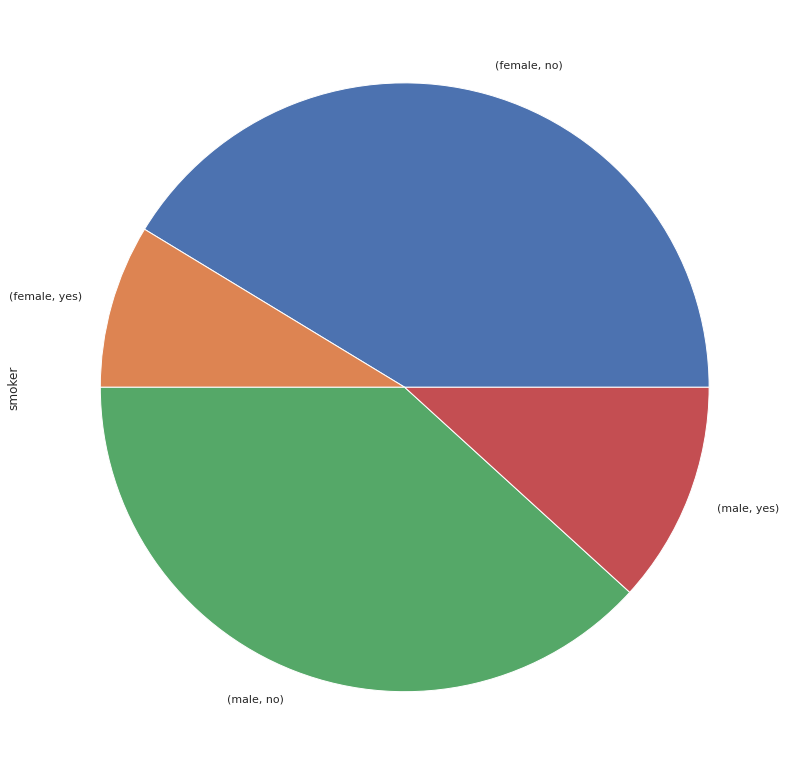

In [26]:
df.groupby("sex")["smoker"].value_counts(normalize=True).plot.pie();

##smoker & charges


tstat value is: 46.66492117272371
pvalue value is: 8.271435842179102e-283 

With a p-value of 0.0 the difference is important. Reject the null Hypothesis.


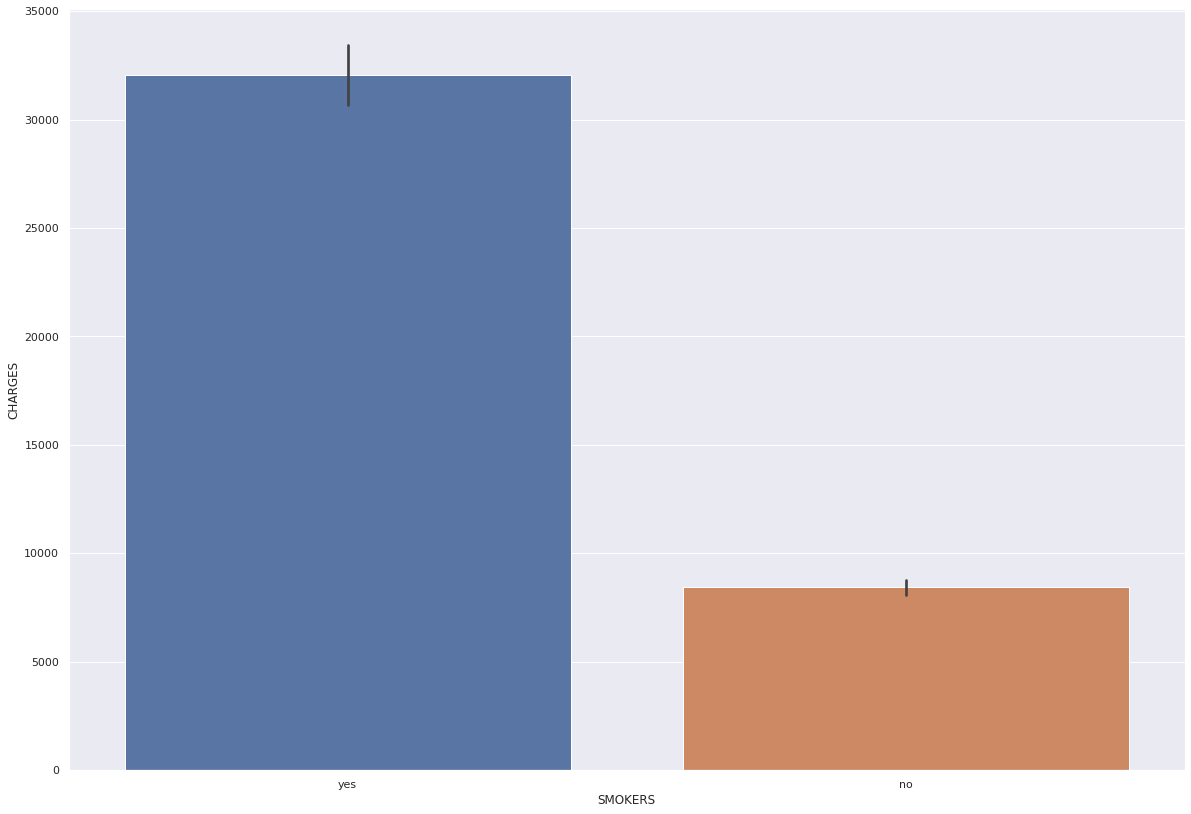

In [27]:
import scipy.stats as stats 
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest

issmoker = df[df['smoker'] == 'yes']['charges'] 
nonsmoker = df[df['smoker'] == 'no']['charges'] 
t_stat, pvalue = stats.ttest_ind(issmoker,nonsmoker, axis = 0)
print('\ntstat value is:',t_stat)
print('pvalue value is:',pvalue,'\n')
if pvalue < 0.05:
    print(f'With a p-value of {round(pvalue,4)} the difference is important. Reject the null Hypothesis.')
else:
    print(f'With a p-value of {round(pvalue,4)} the difference is not important. Fail to reject the null Hypothesis')

sns.barplot(data=df, x='smoker',y='charges')
plt.xlabel('SMOKERS')
plt.ylabel('CHARGES')
plt.show()

In [28]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

##“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

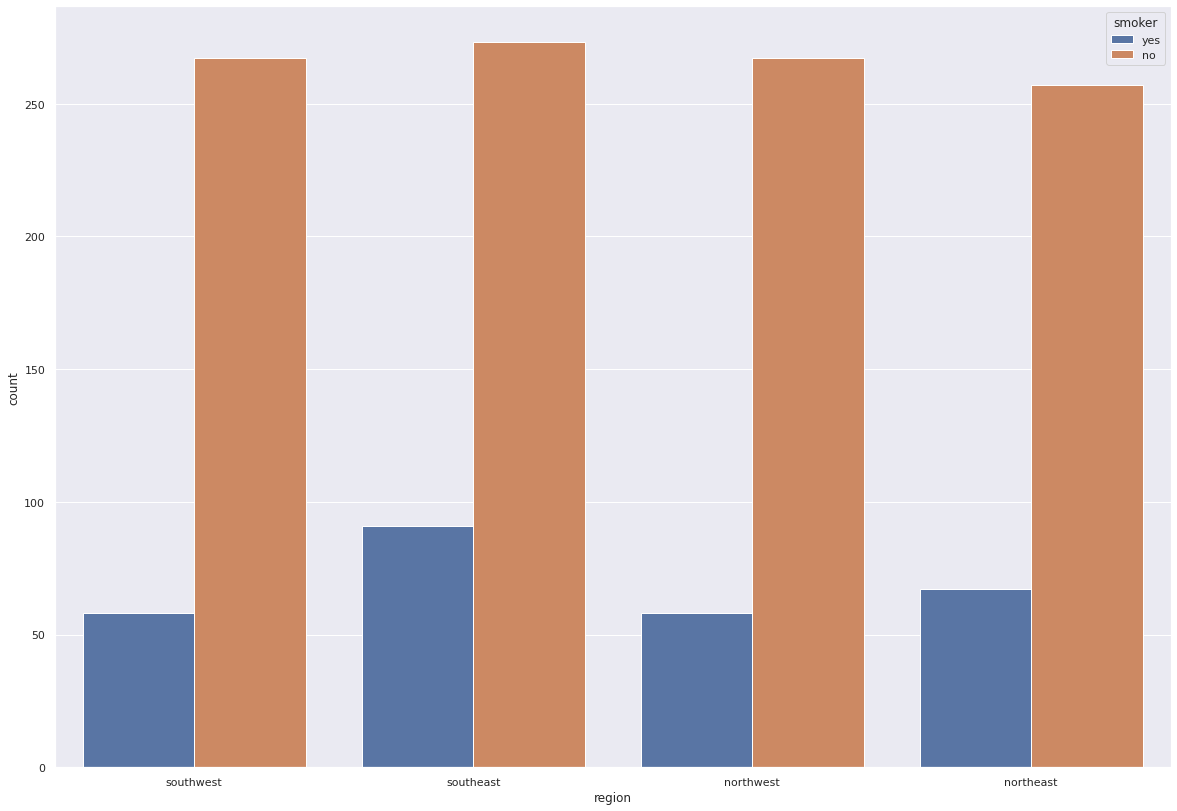

In [29]:
# count plot on two categorical variable
sns.countplot(x ='region', hue='smoker', data = df)
 
# Show the plot
plt.show()
# The highest smoking region is  southeast
# The lowest smoking region is  southwest

## “bmi” ile “sex” arasındaki ilişkiyi inceleyiniz.


tstat value is: 1.696752635752224
pvalue value is: 0.08997637178984932 

With a p-value of 0.09 the difference is not significant. So, We fail to reject the null Hypothesis
Thus, Bmi not differs


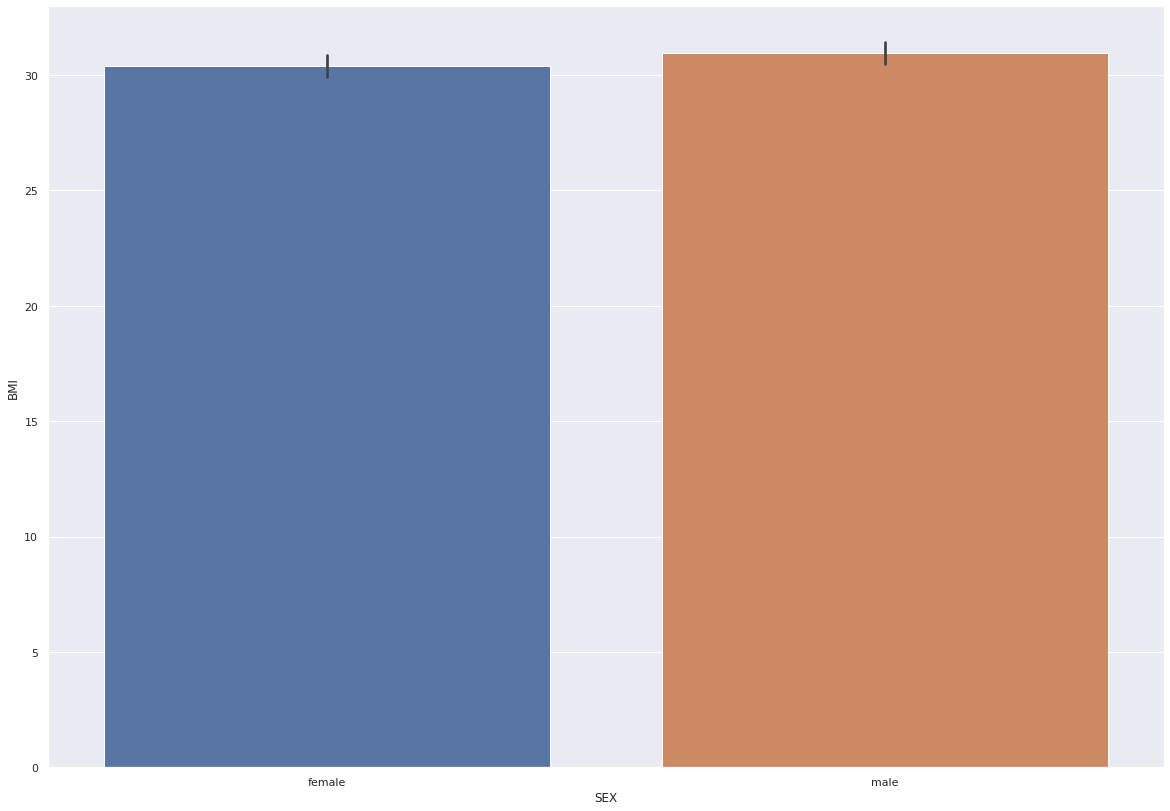

In [30]:
bmi_males = df[df['sex'] == 'male']['bmi']
bmi_females = df[df['sex'] == 'female']['bmi'] 
t_stat, pval = stats.ttest_ind(bmi_males,bmi_females, axis = 0)
print('\ntstat value is:',t_stat)
print('pvalue value is:',pval,'\n')
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. So, we reject the null Hypothesis')
    print('Thus,Bmi of males differ significantly from that of females')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. So, We fail to reject the null Hypothesis')
    print('Thus, Bmi not differs')

sns.barplot(data=df,x='sex',y='bmi')
plt.xlabel('SEX')
plt.ylabel('BMI')
plt.show()

##En çok “children”’a sahip “region”’ı bulunuz (#diğer outputları bozmamak için çalıştırmadım ama çalışıyo :) -zey)

In [31]:
northwest = 0
northeast = 0
southwest = 0
southeast = 0

for row in df.index:
  reg = df['region'][row]
  child = df['children'][row]
  if reg == 'northwest':
    northwest = northwest + int(child)
  elif reg == 'northeast':
    northeast = northeast + int(child)
  elif reg == 'southwest':
    southwest = southwest + int(child)
  elif reg == 'southeast':
    southeast = southeast + int(child)

print('There are %d children from southwest' % (southwest))
print('There are %d children from southeast' % (southeast))
print('There are %d children from northwest' % (northwest))
print('There are %d children from northeast' % (northeast))

There are 371 children from southwest
There are 382 children from southeast
There are 373 children from northwest
There are 339 children from northeast


In [32]:
northwest = 0
northeast = 0
southwest = 0
southeast = 0

reg = df.groupby("region")["children"].value_counts()
for i in range(6):
  northwest += reg[i] * i

for i in range(7,12):
  northeast += reg[i] * (i-6)
  
for i in range(13,18):
  southwest += reg[i] * (i-12)
for i in range(19,24):
  southeast += reg[i] * (i-18)

print(f" number of children in northwest = {northwest} ")
print(f" number of children in northeast = {northeast} ")
print(f" number of children in southwest = {southwest} ")
print(f" number of children in southeast = {southeast} ")

 number of children in northwest = 339 
 number of children in northeast = 373 
 number of children in southwest = 381 
 number of children in southeast = 370 


In [33]:
 df.groupby("region")["children"].value_counts()

region     children
northeast  0           147
           1            77
           2            51
           3            39
           4             7
           5             3
northwest  0           132
           1            74
           2            66
           3            46
           4             6
           5             1
southeast  0           157
           1            95
           2            66
           3            35
           5             6
           4             5
southwest  0           138
           1            78
           2            57
           3            37
           5             8
           4             7
Name: children, dtype: int64

##“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

Text(0.5, 1.0, 'age vs bmi')

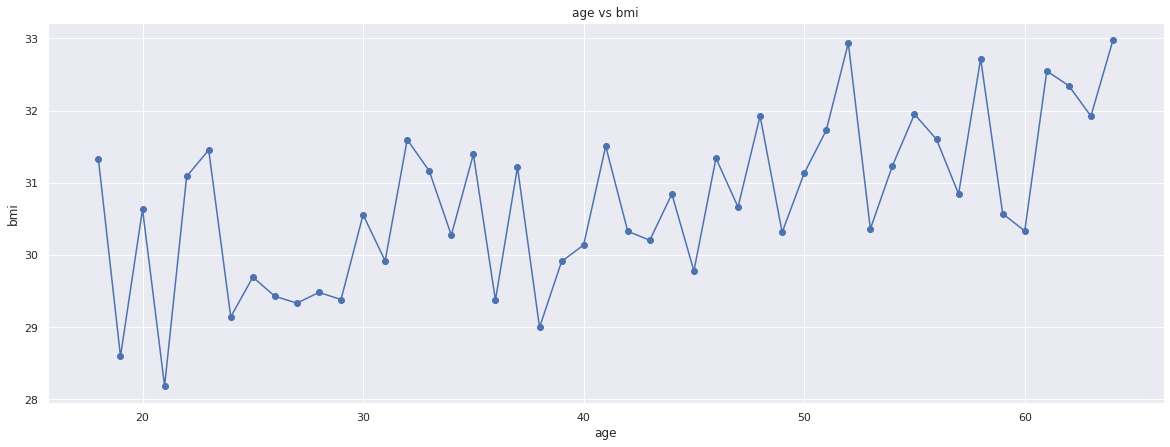

In [34]:
plt.figure(figsize=(20,7))
df.groupby('age')['bmi'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title("age vs bmi")

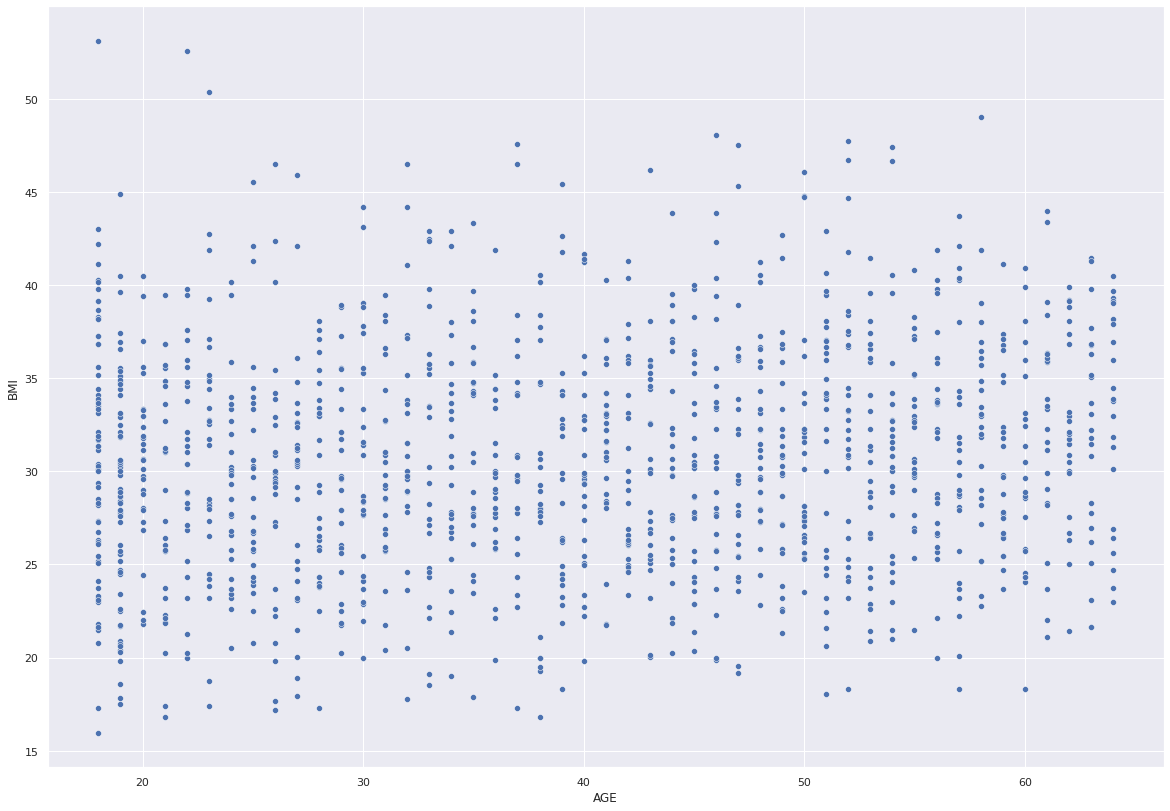

In [35]:
sns.scatterplot(data=df,x='age',y='bmi')
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.show()

## “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

Text(0.5, 1.0, 'children vs bmi')

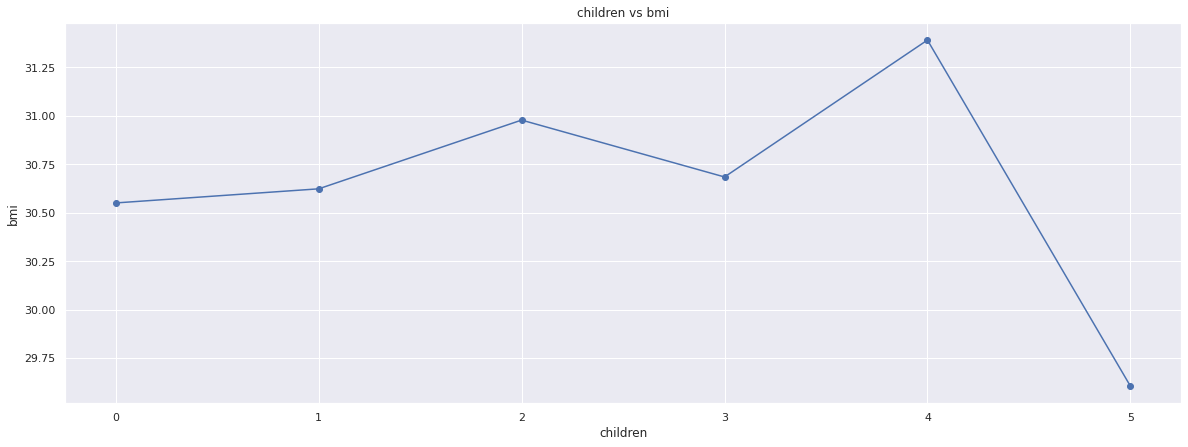

In [36]:
plt.figure(figsize=(20,7))
df.groupby('children')['bmi'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('children')
plt.ylabel('bmi')
plt.title("children vs bmi")

## “bmi” değişkeninde outlier var mıdır? İnceleyiniz. 

In [37]:
#box plot kullanarak outlier olup olmadığını görselleştirmek
fig = px.box(df, y='bmi')

fig.show()

In [38]:
#istatistik analiz ile outlierların sayısını, minimumunu ve maximumunu bulmak
def outlier_finder(df):

   a=df.quantile(0.25) #25th percentile of the dataset
   b=df.quantile(0.75) #75th percentile of the dataset

   iqr = b-a #iqr is the interquartile range

   outlier = df[((df<(a-1.5*iqr)) | (df>(b+1.5*iqr)))]

   return outlier

outliers = outlier_finder(df['bmi']) #bmi değişkenininkileri arıyoruz

print("Outlierların sayısı: "+ str(len(outliers)))

print("Maximum değeri: "+ str(outliers.max()))

print("Minimum değeri: "+ str(outliers.min()))

Outlierların sayısı: 9
Maximum değeri: 53.13
Minimum değeri: 47.41


## “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

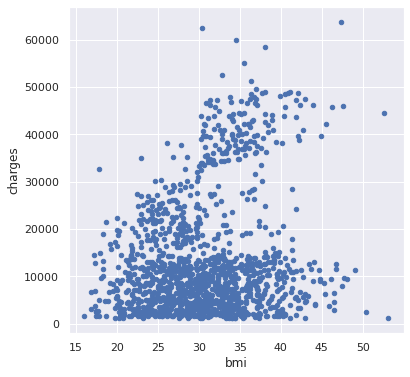

In [39]:
df.plot(kind='scatter', x='bmi', y='charges', figsize=(6,6))

## “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz. 

In [40]:
reg_smo_bmi = df[["region", "smoker", "bmi"]] #kullanılacak columnları ayırmak
reg_smo_bmi.head()


,region,smoker,bmi
0,southwest,yes,27.900
1,southeast,no,33.770
2,southeast,no,33.000
3,northwest,no,22.705
4,northwest,no,28.880


In [41]:
#catagorical value ları numeric olacak şekilde columnlara dağıtmak
transformed = reg_smo_bmi.copy()
transformed = pd.get_dummies(transformed, columns=['region'], prefix = ['region'])
transformed = pd.get_dummies(transformed, columns=['smoker'], prefix = ['smoker'])

transformed.head() 

,bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,27.900,0,0,0,1,0,1
1,33.770,0,0,1,0,1,0
2,33.000,0,0,1,0,1,0
3,22.705,0,1,0,0,1,0
4,28.880,0,1,0,0,1,0


In [42]:
transformed.corr() #correlationlara genel bakış

,bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
bmi,1.000000,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750
region_northeast,-0.138156,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
region_northwest,-0.135996,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
region_southeast,0.270025,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
region_southwest,-0.006205,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945
smoker_no,-0.003750,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000
smoker_yes,0.003750,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000


In [43]:
def redundant(df): #tekrarlanan ikilileri listelemek (bmi,bmi) gibi
    dropper = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            dropper.add((cols[i], cols[j]))
    return dropper
  
c = transformed.corr().unstack() 
labels = redundant(transformed) #droplanacak labelleri fonksiyonu kullanarak değişkene vermek
c = c.drop(labels=labels).sort_values(ascending=False) #gereksiz labellerı droplamak
manuel = {("region_southeast", "region_southwest"), ("smoker_no", "smoker_yes"), ("region_northwest", "region_southeast"), ("region_northeast", "region_southeast"), ("region_northwest", "region_southwest"), ("region_northeast", "region_southwest"), ("region_northeast", "region_northwest")}
c = c.drop(labels=manuel).sort_values(ascending=False) #catagoricalları numerik yaptığımız için oluşan gereksiz labelları droplamak

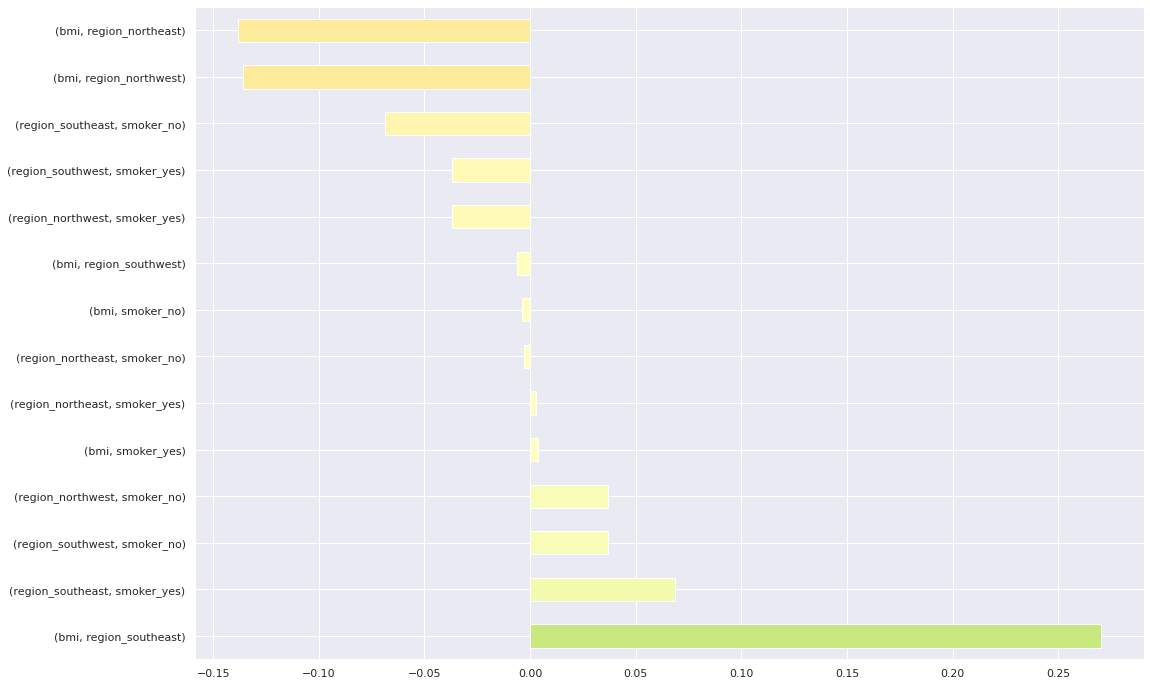

In [44]:
#son olarak correlationları bar plot olarak görselleştirmek
fig, ax = plt.subplots(figsize =(17,12))

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(a)) for a in c.values]

c.plot.barh(color=colors)

# 4. Veri Ön İşleme Yapılması

In [59]:
X = df[['age', 'sex', 'children',
        'smoker', 'region', 'bmi']]

y = df['charges']

In [60]:
from sklearn.model_selection import train_test_split

# 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [61]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform on the training set:
categorical_variables = enc.fit_transform(X_train[['region']]).toarray()

# Transform to dataframe:
categorical_variables = pd.DataFrame(categorical_variables, columns=enc.get_feature_names_out())
#categorical_variables.head(5)

In [62]:
# Merge one-hot-encoded variables to the training set:
X_train = X_train.merge(categorical_variables,
                         how='left',
                         right_index=True,
                         left_index=True)

# remove the original columns:
X_train = X_train.drop(columns=['region'])

In [63]:
print(X_train)

      age     sex  children smoker     bmi  region_northeast  \
560    46  female         2     no  19.950               0.0   
1285   47  female         0     no  24.320               NaN   
1142   52  female         0     no  24.860               NaN   
969    39  female         5     no  34.320               1.0   
486    54  female         3     no  21.470               0.0   
...   ...     ...       ...    ...     ...               ...   
1095   18  female         4     no  31.350               NaN   
1130   39  female         5     no  23.870               NaN   
1294   58    male         0     no  25.175               NaN   
860    37  female         2    yes  47.600               0.0   
1126   55    male         0     no  29.900               NaN   

      region_northwest  region_southeast  region_southwest  
560                1.0               0.0               0.0  
1285               NaN               NaN               NaN  
1142               NaN               NaN        

In [64]:
X_train.sex.unique()

array(['female', 'male'], dtype=object)

In [65]:
X_train.sex = X_train.sex.apply(lambda x: 1 if x=='female' else 0)
X_test.sex = X_test.sex.apply(lambda x: 1 if x=='female' else 0)

In [66]:
print(X_train)

      age  sex  children smoker     bmi  region_northeast  region_northwest  \
560    46    1         2     no  19.950               0.0               1.0   
1285   47    1         0     no  24.320               NaN               NaN   
1142   52    1         0     no  24.860               NaN               NaN   
969    39    1         5     no  34.320               1.0               0.0   
486    54    1         3     no  21.470               0.0               0.0   
...   ...  ...       ...    ...     ...               ...               ...   
1095   18    1         4     no  31.350               NaN               NaN   
1130   39    1         5     no  23.870               NaN               NaN   
1294   58    0         0     no  25.175               NaN               NaN   
860    37    1         2    yes  47.600               0.0               0.0   
1126   55    0         0     no  29.900               NaN               NaN   

      region_southeast  region_southwest  
560     

In [67]:
X_train.smoker.unique()

array(['no', 'yes'], dtype=object)

In [68]:
X_train.smoker = X_train.smoker.apply(lambda x: 1 if x=='yes' else 0)
X_test.smoker = X_test.smoker.apply(lambda x: 1 if x=='yes' else 0)

In [69]:
X_train = X_train.fillna(0)

In [70]:
X_train

,age,sex,children,smoker,bmi,region_northeast,region_northwest,region_southeast,region_southwest
560,46,1,2,0,19.950,0.0,1.0,0.0,0.0
1285,47,1,0,0,24.320,0.0,0.0,0.0,0.0
1142,52,1,0,0,24.860,0.0,0.0,0.0,0.0
969,39,1,5,0,34.320,1.0,0.0,0.0,0.0
486,54,1,3,0,21.470,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,18,1,4,0,31.350,0.0,0.0,0.0,0.0
1130,39,1,5,0,23.870,0.0,0.0,0.0,0.0
1294,58,0,0,0,25.175,0.0,0.0,0.0,0.0
860,37,1,2,1,47.600,0.0,0.0,0.0,1.0


In [71]:
# Transform the test set:
categorical_variables = enc.transform(X_test[['region']]).toarray()

# Transform to dataframe:
categorical_variables = pd.DataFrame(categorical_variables, columns=enc.get_feature_names_out())

# Merge one-hot-encoded variables to the training set:
X_test = X_test.reset_index(drop=True)
X_test = X_test.merge(categorical_variables,
                        how='left',
                        right_index=True,
                        left_index=True)

# remove the original columns:
X_test = X_test.drop(columns=['region'])

In [72]:
X_test.dropna()

,age,sex,children,smoker,bmi,region_northeast,region_northwest,region_southeast,region_southwest
0,45,1,2,0,25.175,1.0,0.0,0.0,0.0
1,36,1,0,0,30.020,0.0,1.0,0.0,0.0
2,64,1,0,1,26.885,0.0,1.0,0.0,0.0
3,46,0,3,0,25.745,0.0,1.0,0.0,0.0
4,19,0,0,1,31.920,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
263,63,0,0,1,35.090,0.0,0.0,1.0,0.0
264,58,1,0,0,27.170,0.0,1.0,0.0,0.0
265,38,0,1,0,28.025,1.0,0.0,0.0,0.0
266,54,1,0,1,47.410,0.0,0.0,1.0,0.0


# 5. Model Seçme

● Birkaç regresyon modeli seçiniz bunları ön işleme yapılan veri ile eğitiniz
● Seçilen modellerin performanslarını çapraz doğrulama kullanarak inceleyiniz.
● En iyi performans gösteren modeli seçiniz

## Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=44)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

In [74]:
dt_reg.score(X_train,y_train)

0.9994940317409223

In [75]:
dt_reg.score(X_test,y_test)

0.6661701041643577

In [76]:
dt_pred=dt_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



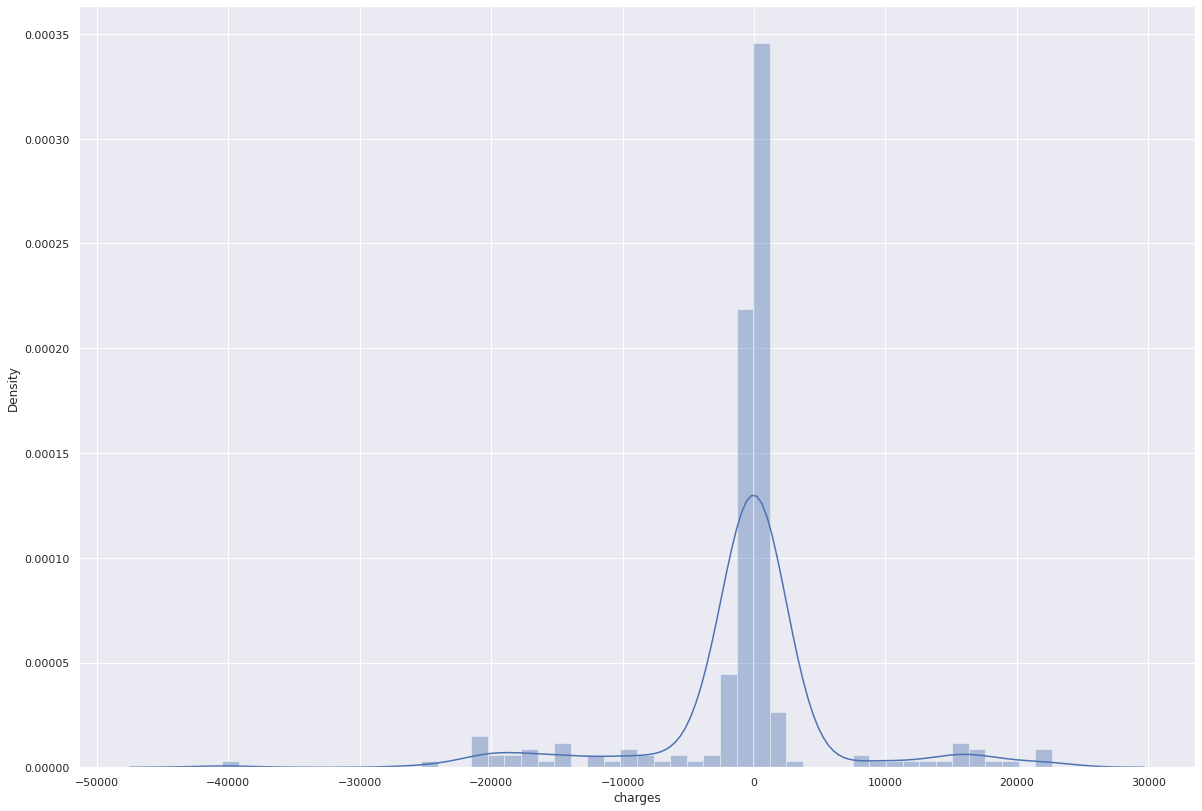

In [77]:
sns.distplot(y_test-dt_pred)

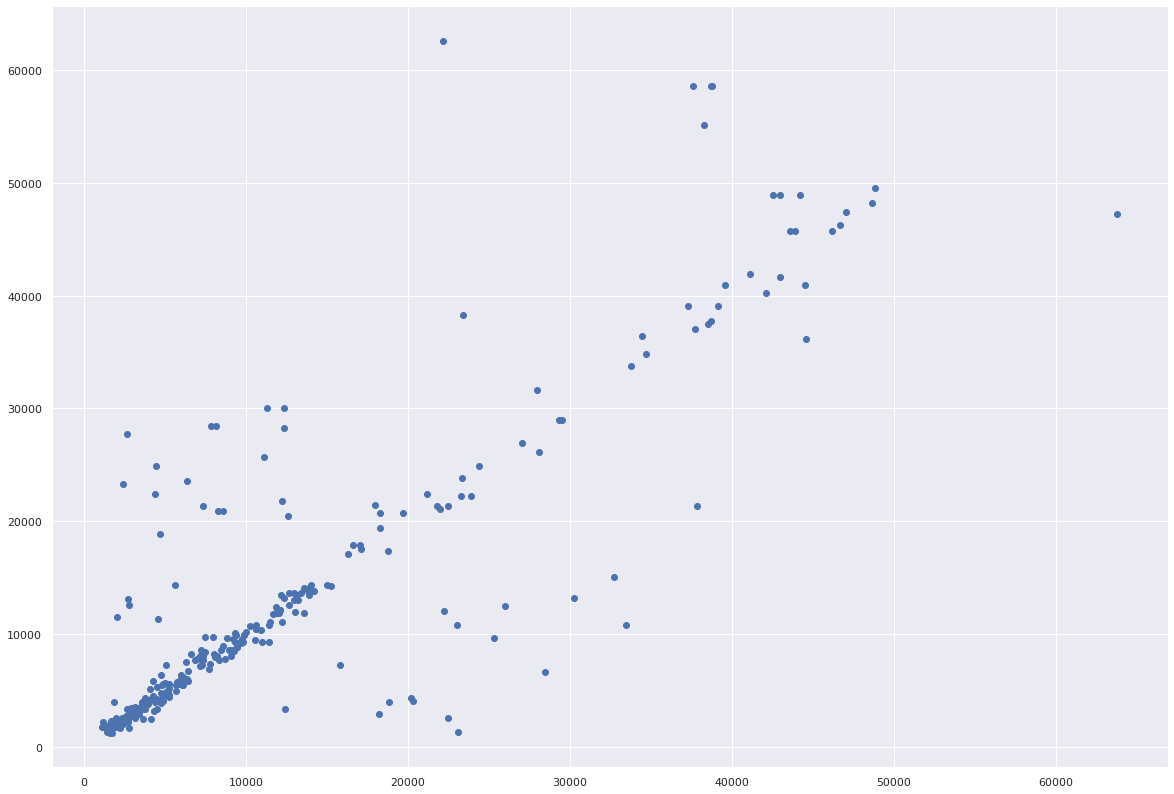

In [78]:
plt.scatter(y_test,dt_pred)

In [79]:
# without hyperparameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))

MAE: 3383.060632242537
MSE: 51826667.86251434
RMSE: 7199.074097584657


## Random Forest Regression

In [80]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rf_model.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [81]:
rf_pred = rf_model.predict(X_test)  # test the output by changing values
print(rf_pred)

[ 9059.1115837   5470.6634615  27946.9068395   9477.8595865
 34625.0457762   9855.3709396   1957.9637415  14142.3712955
  6796.834005   10754.6323984  19692.781474    7155.3528129
  6940.1681121  45718.283703   48602.1826324  44935.1180951
 11384.8773806  42827.6457612  11367.1686527  26847.3121813
  7694.6221661  10948.7722212   2415.9358444   2067.2610505
 15152.5499351  12931.7444138  14172.0121164   5703.833958
  9789.7294642   3711.7232549   8196.7006118  12323.7784184
  3955.7210123   5224.9387175   3771.2706989   8878.6734215
  4112.4638541   8256.0573397  24052.9444897  39512.5068204
 13187.2235077   5380.8833538  12961.8007927  13778.787959
  6716.9001699  13552.8652843  12033.2003953  12049.1336588
 42065.1561444   7488.007337   14085.0172706   3495.8368249
  7228.5982975   2798.8839535  11602.3102902   9916.6369735
  3862.2922801  44665.9070618  13290.7441589  15310.0352124
 14194.6288228   6166.3187596  20669.1129775   7913.8890169
 14178.7093749   5816.7351311  19535.20816

In [82]:
# without hyperparameter tuning (Random Forest)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 2741.4071533592355
MSE: 21494497.141060155
RMSE: 4636.215821233968


## Extra Trees Regressor

In [83]:
from sklearn import ensemble
ext_model = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)

In [84]:
ext_model.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=10, max_features=0.3, n_estimators=5, n_jobs=-1,
                    random_state=0)

In [85]:
importances = ext_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in ext_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]

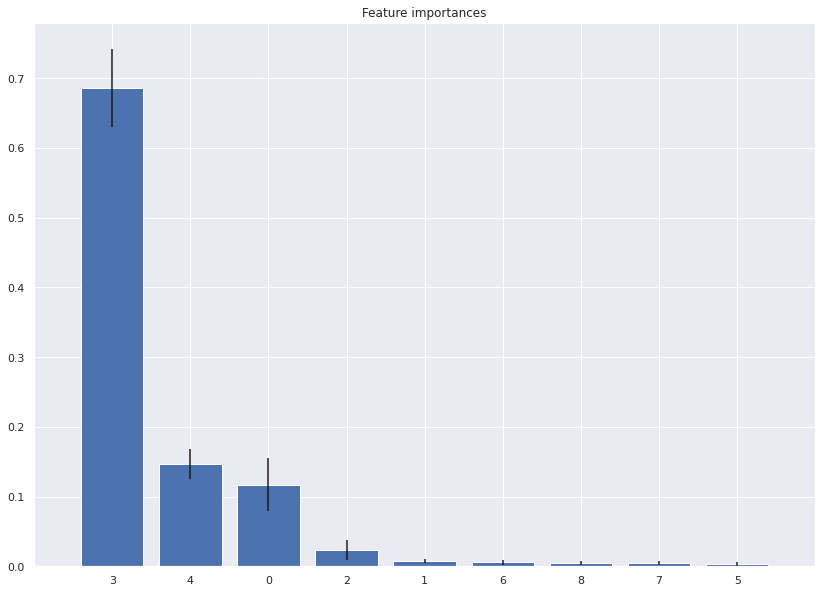

In [86]:
plt.figure(figsize=(14,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
plt.show()

In [87]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
ex_model = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
results = model_selection.cross_val_score(ext_model, X_train, y_train, cv=kfold)
print(results.mean())

0.7737549604793037


In [88]:
ex_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, max_features=0.3, n_estimators=5, n_jobs=-1,
                    random_state=0)

In [89]:
ex_pred = ex_model.predict(X_test)

##Linear regression

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [91]:
predictions = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [93]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

5886.713934525814

In [94]:
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": predictions})

In [95]:
comparison.head()

,Actual Values,Predictions
764,9095.06825,8232.164167
887,5272.17580,6881.567070
890,29330.98315,36792.254005
1293,9301.89355,9343.377958
259,33750.29180,26828.732822


In [96]:
comparison.tail()

,Actual Values,Predictions
109,47055.53210,39908.807954
575,12222.89830,11633.750014
535,6067.12675,6953.499802
543,63770.42801,41601.091150
846,9872.70100,11898.493587


##Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(dt_reg,X_train,y_train,cv=kf)
print("\nDecision Tree Regression için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))

score=cross_val_score(rf_model,X_train,y_train,cv=kf)
print("\nRandom Forest Regression için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))

score=cross_val_score(ext_model,X_train,y_train,cv=kf)
print("\nExtra Trees regressor için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))

score=cross_val_score(model,X_train,y_train,cv=kf)
print("\nLinear Regression için: ")
print("Cross Validation Score: {}".format(score))
print("Ortalama Cross Validation score :{}".format(score.mean()))


Decision Tree Regression için: 
Cross Validation Score: [0.69965248 0.83270568 0.60795564 0.58242124 0.73032453]
Ortalama Cross Validation score :0.6906119154696956

Random Forest Regression için: 
Cross Validation Score: [0.82366186 0.90670079 0.79496923 0.75746382 0.83392923]
Ortalama Cross Validation score :0.8233449826591197

Extra Trees regressor için: 
Cross Validation Score: [0.74218885 0.81378823 0.71056241 0.67315004 0.77905195]
Ortalama Cross Validation score :0.7437482938278719

Linear Regression için: 
Cross Validation Score: [0.71875363 0.79944633 0.7235786  0.66030074 0.76552597]
Ortalama Cross Validation score :0.733521052030946


#6. Hiper-parametre Optimizasyonu

● Bir önceki adımda seçilen modelin hiper-parametrelerinin optimize ediniz.
● Grid Search ile parametreleri optimize ediniz.

## Decision Tree Regressor (Grid Search)

In [100]:
parameters={"splitter":["best","random"],
            "max_depth" : [3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [101]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dt_reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train, y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-124891402.576 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-136421862.178 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-152248307.168 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-134441891.198 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-142392727.766 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=None, min_samples_leaf=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


24000 fits failed out of a total of 54000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=44),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [102]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [103]:
tuning_model.best_score_

-33288773.30820793

In [104]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [105]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [106]:
tuned_pred=tuned_hyper_model.predict(X_test)

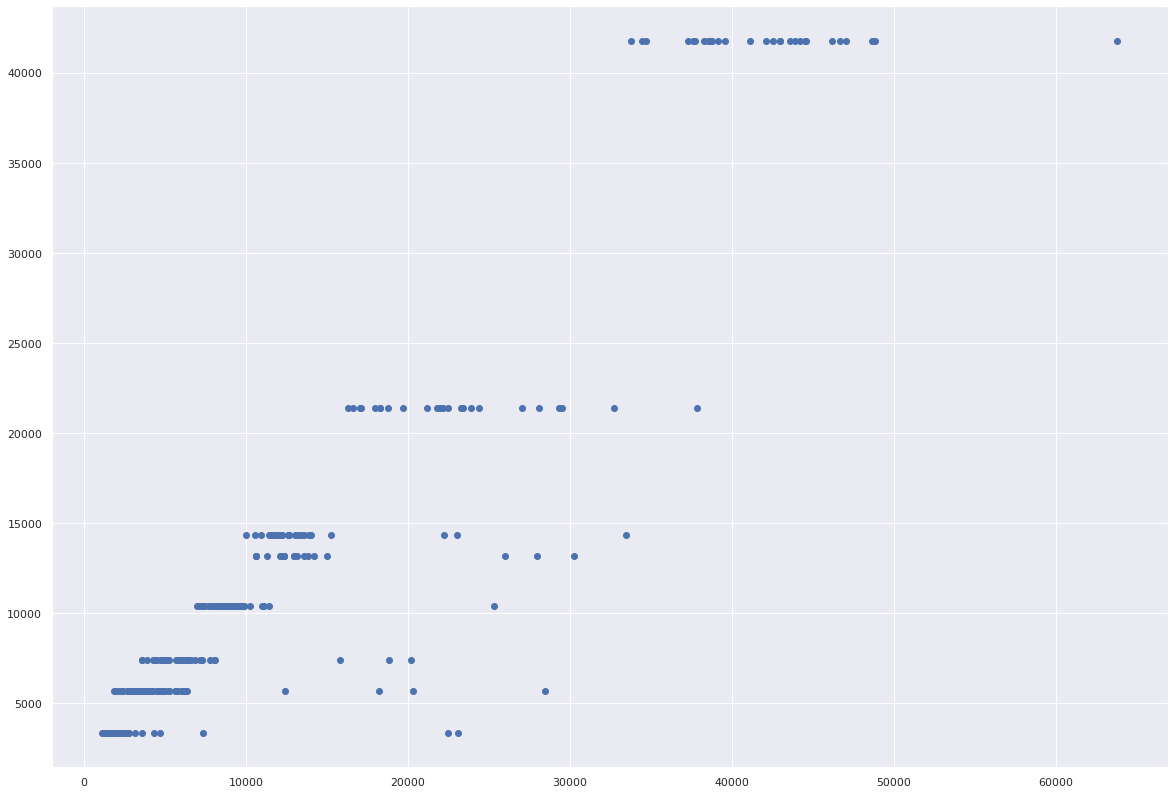

In [107]:
plt.scatter(y_test,tuned_pred)

## Gradient Boosting (Grid Search)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
GBR = GradientBoostingRegressor()

In [109]:
params = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
           }

In [110]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = params, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [111]:
print("\n The best estimator:\n",grid_GBR.best_estimator_)
print("\n The best score:\n",grid_GBR.best_score_)
print("\n The best parameters:\n",grid_GBR.best_params_)


 The best estimator:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.9)

 The best score:
 0.8371847009519311

 The best parameters:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [112]:
best_params = {'learning_rate': [0.03],
                  'subsample'    : [0.9],
                  'n_estimators' : [100],
                  'max_depth'    : [4]
           }

In [113]:
grid_GBR_best = GridSearchCV(estimator=GBR, param_grid = best_params, cv = 2, n_jobs=-1)

In [114]:
grid_GBR_best.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03], 'max_depth': [4],
                         'n_estimators': [100], 'subsample': [0.9]})

In [115]:
gbr_pred=grid_GBR_best.predict(X_test)
print(gbr_pred)

[ 9916.05613851  6287.08958984 26969.87699826  9695.41914041
 33814.26948854  6595.93734641  3242.68105381 14926.47132467
  5280.76655803 10876.4451412  19085.79643145  7864.09226581
  6042.73423244 43080.41904846 45652.72226266 42931.47163773
 12652.61823658 42417.72002225 11037.54325866 24269.17391554
  7775.77851482  9637.16484267  3293.9888313   3614.36795793
 11434.29395148 12436.15800305 14325.1818856   6917.34485014
 11116.95500575  3348.22016623  8532.6246102  12670.81480355
  3813.77190228  6614.179448    5682.4675581   9413.32511729
  4615.71178704  9229.07629201 23298.68941286 39346.67641928
  7435.469939    4886.72958872 13273.57227414 14288.43941875
  7977.20558826 15185.56908279  6991.26082701  7160.74466284
 41580.68639901  7082.73487256 14397.24662466  4431.89819718
  7045.34333103  2684.19378178 12671.0807095  10998.68756248
  4810.77263366 43834.36581136 12556.58426337 12280.83222833
 14264.83322759  6422.07722176 15872.90335182  8165.99197992
 11649.01979739  6114.39

# 7. Modeli Değerlendirme

● Regresyon modeli değerlendirme metriklerini kullanarak optimize edilmiş olan
modelin değerlendirmesini yapınız. (Ör. Mean Squared Error, Mean Absolute Error
vb.)

In [116]:
# With hyperparameter tuned Decision Tree Regressor
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))

MAE: 2894.301647184615
MSE: 22111245.935431756


Her iki decision tree regression modeli için de yukarıdaki metrikleri gözlemlerseniz, hiperparametre ayarı olmayan modele kıyasla hiperparametre ayarlama modeliyle iyi metrik değerler (MSE 22111245) elde ettik.

In [117]:
# With hyperparameter tuned Gradient Boosting Regressor
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))

MAE: 2652.5058046864337
MSE: 19921943.292465802


Gradient Boosting Regressor modeli Grid Search ve hyperparameter tunning kullanılarak decision tree regressor (with hyperparameter tunning) modeline göre daha düşük bir MSE sonucu verdi. 